In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import pymannkendall as mk
import math
import numpy as np


# Avaliação estacionareidade climática regional

In [2]:
def consolidate_yearly_series(monthly_series, consolidation_function = lambda x: np.mean(x)):
    yearly_series = [monthly_series[x:x+12] for x in range(0, len(monthly_series),12)]
    yearly_series = [consolidation_function(year) for year in yearly_series]
    return yearly_series

def analyse_series_trend_simplified(monthly_series, consolidation_function = lambda x: np.mean(x)):
    yearly_series = consolidate_yearly_series(monthly_series, consolidation_function)
    plt.plot(monthly_series)
    plt.plot(np.arange(start=12,stop=len(monthly_series)+12,step=12),yearly_series,c='black')
    plt.show()
    print(mk.original_test(yearly_series))

def analyse_series_trend(monthly_series, monthly_series_years):
    xs = list(set(monthly_series_years))
    xs.sort()
    ys = [[] for x in xs]
    for i,year in enumerate(xs):
        for datas, data_year in zip(monthly_series, monthly_series_years):
            if data_year == year:
                ys[i].append(datas)
    
    yearly_series = [np.mean(y) for y in ys]
    
    plt.plot(xs,yearly_series)
    plt.tick_params(axis='x', rotation=45)
    plt.show()
    print(mk.original_test(yearly_series))
    return xs, yearly_series



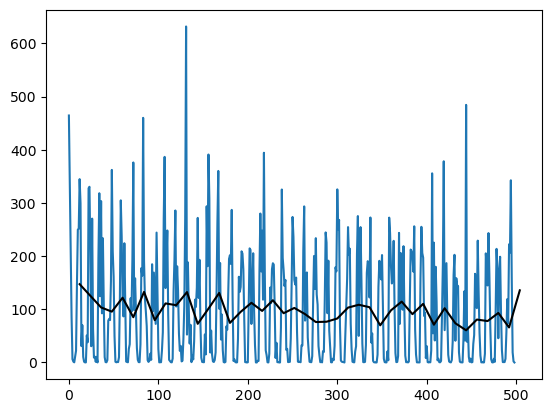

Mann_Kendall_Test(trend='decreasing', h=True, p=0.006741572299601595, z=-2.7093473332599647, Tau=-0.29152148664343785, s=-251.0, var_s=8514.333333333334, slope=-0.8174687499999997, intercept=114.28427604166666)


In [3]:
monthly_series = pd.read_csv(r'00_GERAL\\precipitacao.csv')['undefined']
analyse_series_trend_simplified(monthly_series)

# Análise hidrogeológica geral

['Apr', 'May', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Feb', 'Mar', 'Apr', 'May', 'Jul', 'Aug', 'Sep', 'Oct', 'Dec', 'Jan', 'Feb', 'Mar', 'Jun', 'Jul', 'Aug', 'Sep', 'Nov', 'Dec', 'Jan', 'Feb', 'Apr', 'May', 'Jun', 'Jul', 'Oct', 'Nov', 'Dec', 'Jan', 'Mar', 'Apr', 'May', 'Jun', 'Aug', 'Sep', 'Oct', 'Nov', 'Jan', 'Feb', 'Mar', 'Apr', 'Jun', 'Aug'

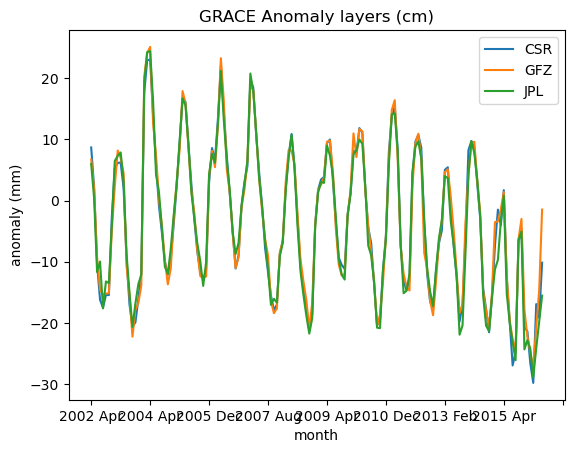

In [4]:
base_path = R"Pixel 03 - TESTE"
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

grace_1 = pd.read_csv(base_path+"\GRACE_lwe_thickness_csr.csv")
grace_2 = pd.read_csv(base_path+"\GRACE_lwe_thickness_gfz.csv")
grace_3 = pd.read_csv(base_path+"\GRACE_lwe_thickness_jpl.csv")

grace_monthly_years = [str(date)[-4:] for date in grace_3["system:time_start"]]
grace_monthly_months = [str(date)[:3] for date in grace_3["system:time_start"]]
grace_monthly_dates = [year + " " + month for year, month in zip(grace_monthly_years,grace_monthly_months)]
print(grace_monthly_months)

plt.plot(grace_monthly_dates,grace_1["undefined"])
plt.plot(grace_monthly_dates,grace_2["undefined"])
plt.plot(grace_monthly_dates,grace_3["undefined"])

plt.title("GRACE Anomaly layers (cm)")
plt.legend(["CSR","GFZ","JPL"])
plt.ylabel("anomaly (mm)")
plt.xlabel("month")

max_yticks = 10
xloc = plt.MaxNLocator(max_yticks)
ax.xaxis.set_major_locator(xloc)

plt.show()

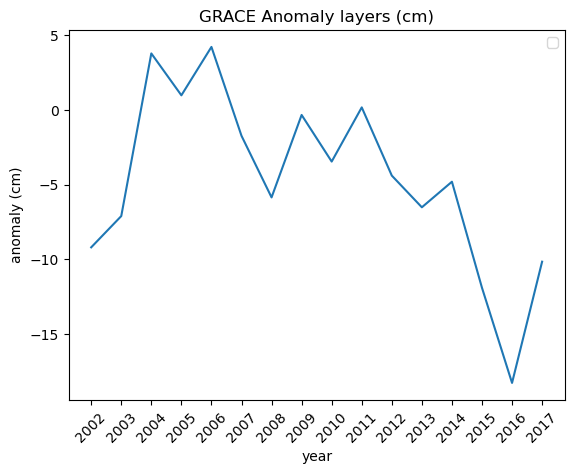

Mann_Kendall_Test(trend='decreasing', h=True, p=0.042763425833193924, z=-2.0260132600083667, Tau=-0.38333333333333336, s=-46.0, var_s=493.3333333333333, slope=-0.8592423562548563, intercept=1.853539894133645)


In [5]:
plt.title("GRACE Anomaly layers (cm)")
plt.legend(["Mensal","Anual"])
plt.ylabel("anomaly (cm)")
plt.xlabel("year")
grace_data = pd.read_csv(base_path+"\GRACE_lwe_thickness_csr.csv")

grace_monthly_anomaly = grace_data["undefined"]
grace_monthly_years = [str(date)[-4:] for date in grace_data["system:time_start"]]

grace_years, grace_yearly = analyse_series_trend(grace_monthly_anomaly, grace_monthly_years)


In [6]:
moisture_monthly_10 = pd.read_csv(base_path+'\GLDAS_SoilMoi0_10cm_inst.csv')['undefined']
moisture_monthly_40 = pd.read_csv(base_path+'\GLDAS_SoilMoi10_40cm_inst.csv')['undefined']
moisture_monthly_100 = pd.read_csv(base_path+'\GLDAS_SoilMoi40_100cm_inst.csv')['undefined']

moisture_monthly = moisture_monthly_10 + moisture_monthly_40 + moisture_monthly_100
moisture_monthly = moisture_monthly - np.mean(moisture_monthly)
moisture_monthly = moisture_monthly / 10

moisture_monthly_years = [str(date)[-4:] for date in pd.read_csv(base_path+'\GLDAS_SoilMoi40_100cm_inst.csv')["system:time_start"]]

TypeError: 'list' object is not callable

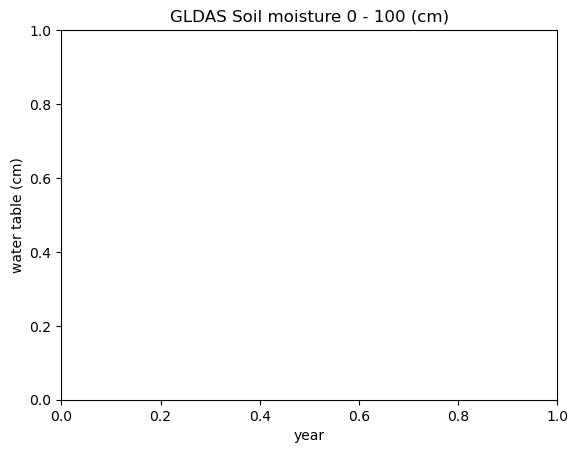

In [16]:
plt.title("GLDAS Soil moisture 0 - 100 (cm)")
plt.ylabel("water table (cm)")
plt.xlabel("year")

moisture_yearly_10 = consolidate_yearly_series(moisture_monthly_10/10)
xs = np.array(range(len(moisture_yearly_10))) + 2000
plt.bar(xs,moisture_yearly_10, color='r')


moisture_yearly_40 = consolidate_yearly_series(moisture_monthly_40/10)
plt.bar(xs,moisture_yearly_40, color='orange', bottom=1)


moisture_yearly_100 = consolidate_yearly_series(moisture_monthly_100/10)
plt.bar(xs,moisture_yearly_100, color='green', bottom=2)
plt.legend(["Umidade 0 - 10 cm","Umidade 10 - 40 cm","Umidade 40 - 100 cm"])

plt.show()

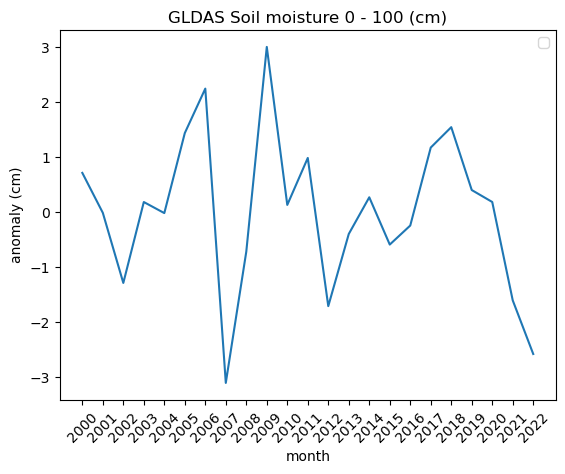

Mann_Kendall_Test(trend='no trend', h=False, p=0.6726109872286647, z=-0.4225673021598867, Tau=-0.06719367588932806, s=-17.0, var_s=1433.6666666666667, slope=-0.026442916666666698, intercept=0.42147715579709977)


In [8]:
plt.title("GLDAS Soil moisture 0 - 100 (cm)")
plt.legend(["Mensal","Anual"])
plt.ylabel("anomaly (cm)")
plt.xlabel("month")

moisture_years, moisture_yearly = analyse_series_trend(moisture_monthly,moisture_monthly_years)

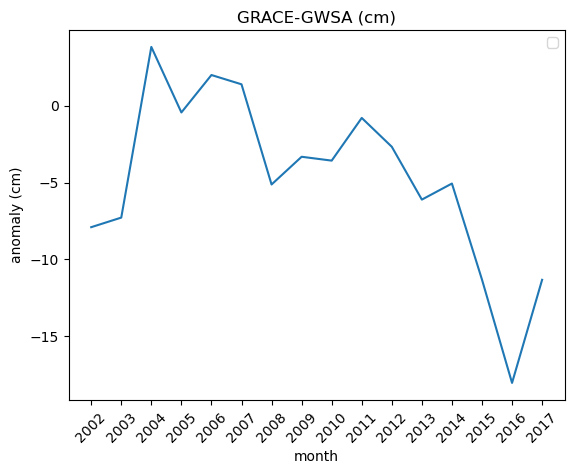

Mann_Kendall_Test(trend='decreasing', h=True, p=0.03433985000756268, z=-2.1160582937865167, Tau=-0.4, s=-48.0, var_s=493.3333333333333, slope=-0.8105671875000005, intercept=1.7582974448973472)


In [9]:
moisture_years_crop = moisture_years[2:][:-5]
moisture_yearly_crop = moisture_yearly[2:][:-5]
grace_years_crop = grace_years 
grace_yearly_crop = grace_yearly
water_table = np.array(grace_yearly_crop) - np.array(moisture_yearly_crop)

plt.title("GRACE-GWSA (cm)")
plt.legend(["Mensal","Anual"])
plt.ylabel("anomaly (cm)")
plt.xlabel("month")

water_table_years, water_table_yearly = analyse_series_trend(water_table, grace_years_crop)

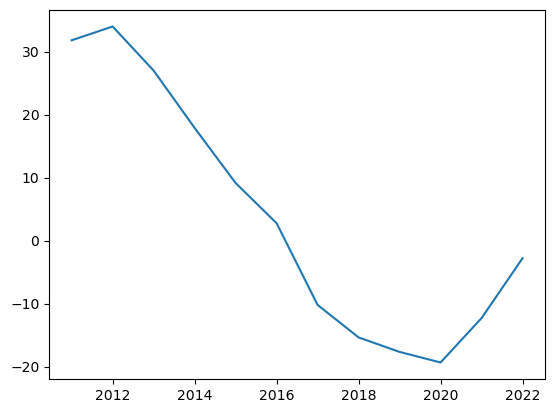

Mann_Kendall_Test(trend='decreasing', h=True, p=0.0012689552286568873, z=-3.222909762221586, Tau=-0.7272727272727273, s=-48.0, var_s=212.66666666666666, slope=-5.689088888888889, intercept=31.262988888888888)
12


In [10]:
measured_anomaly = [31.782,33.974,26.974,17.876,9.128,2.751,-10.220,-15.374,-17.677,-19.354,-12.310,-2.805]
measured_anomaly_years = np.arange(start=2011,stop=2023,step=1)

plt.plot(measured_anomaly_years,measured_anomaly)
plt.show()
print(mk.original_test(measured_anomaly))
print(len(measured_anomaly))

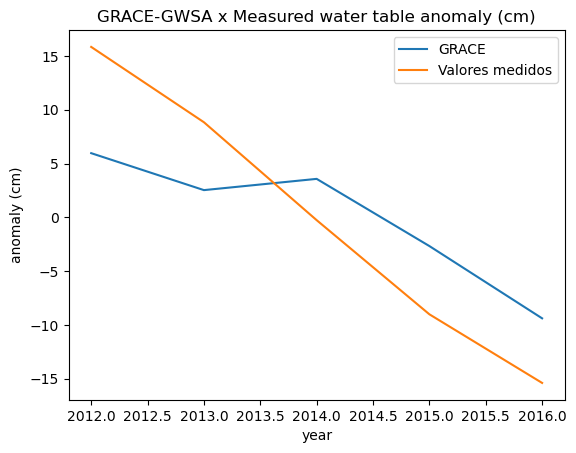

In [11]:
plt.title("GRACE-GWSA x Measured water table anomaly (cm)")
plt.ylabel("anomaly (cm)")
plt.xlabel("year")
water_table_years = [int(x) for x in water_table_years]
water_table_years = water_table_years[10:-1]
water_table_yearly = water_table_yearly[10:-1]
water_table_yearly = np.array(water_table_yearly)
water_table_yearly = np.subtract(water_table_yearly, np.mean(water_table_yearly))
water_table_yearly = list(water_table_yearly)
plt.plot(water_table_years, water_table_yearly)

measured_anomaly_years = measured_anomaly_years[1:-6]
measured_anomaly = measured_anomaly[1:-6]
measured_anomaly = np.array(measured_anomaly)
measured_anomaly = np.subtract(measured_anomaly, np.mean(measured_anomaly))
measured_anomaly = list(measured_anomaly)
plt.plot(measured_anomaly_years, measured_anomaly)
plt.legend(["GRACE","Valores medidos"])

plt.show()

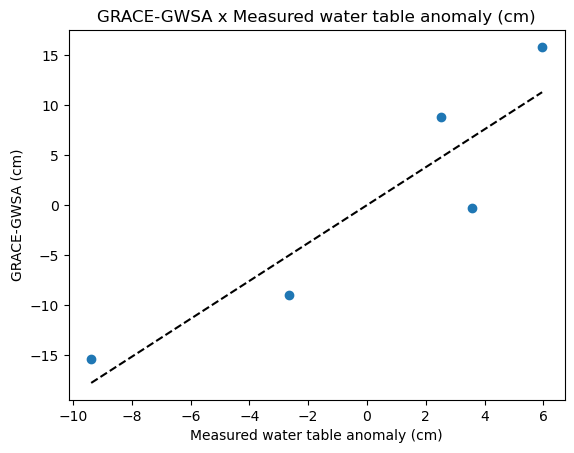

In [14]:
plt.title("GRACE-GWSA x Measured water table anomaly (cm)")
plt.ylabel("GRACE-GWSA (cm)")
plt.xlabel("Measured water table anomaly (cm)")

coef = np.polyfit(water_table_yearly,measured_anomaly,1)
poly1d_fn = np.poly1d(coef) 

range = [np.min(water_table_yearly),np.max(water_table_yearly)]
plt.scatter(water_table_yearly,measured_anomaly)
plt.plot(range, poly1d_fn(range), '--k')

In [15]:
import statsmodels.api as sm

model = sm.OLS(measured_anomaly, sm.add_constant(water_table_yearly))
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     15.00
Date:                Wed, 31 May 2023   Prob (F-statistic):             0.0305
Time:                        11:00:22   Log-Likelihood:                -14.772
No. Observations:                   5   AIC:                             33.54
Df Residuals:                       3   BIC:                             32.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0      2.681          0      1.0

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
